### Apply the Scikit Learn Decision Tree Classifier code to the Iris dataset using all three categories and all four feature at once and upload your .ipynd file
### See if your choice of impurity measure makes a difference in your results

In [1]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets


# Loading the IRIS dataset
iris = datasets.load_iris()
y = iris.target
features = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]

## Entropy

In [2]:
X = iris.data[:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

MaxDepth = 5
Errors = np.zeros((MaxDepth, 2))
print ('Max Depth, Training, Test')

for i in range(0, MaxDepth):    
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)
    
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    
    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
      
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.304761904762 0.4
2 0.0380952380952 0.0888888888889
3 0.0190476190476 0.0222222222222
4 0.0 0.0222222222222
5 0.0 0.0222222222222


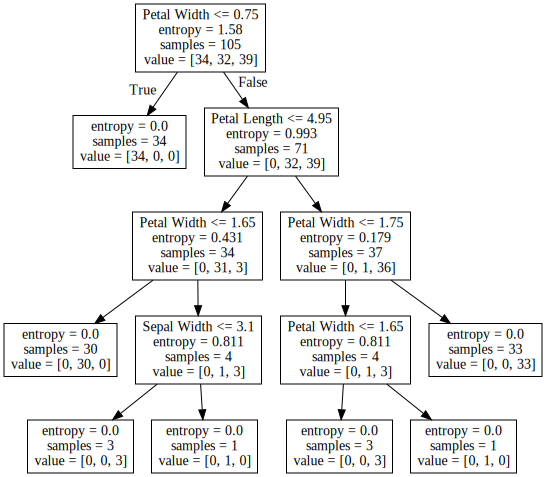

In [3]:
# plot the final decision gree
export_graphviz(tree, out_file='entropy.dot', feature_names=features)
with open('entropy.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

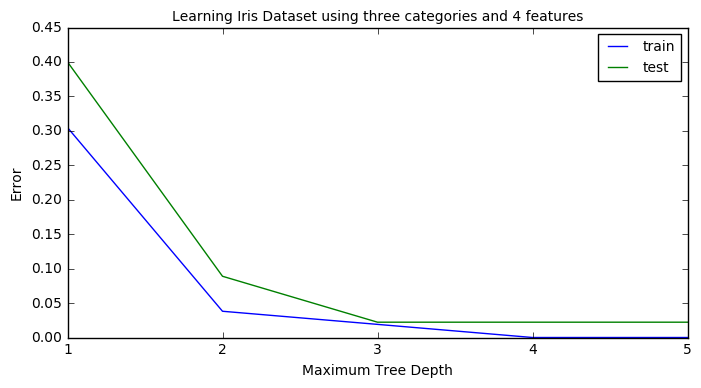

In [4]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset using three categories and 4 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

## Gini

In [5]:
MaxDepth = 5
Errors = np.zeros((MaxDepth, 2))
print ('Max Depth, Training, Test')

for i in range(0, MaxDepth):    
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=0)
    tree.fit(X_train, y_train)
    
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    
    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
      
    
    Errors[i,0] = 1 - tree.score(X_train,y_train)
    Errors[i,1] = 1 - tree.score(X_test,y_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.304761904762 0.4
2 0.0380952380952 0.0888888888889
3 0.0190476190476 0.0222222222222
4 0.0 0.0222222222222
5 0.0 0.0222222222222


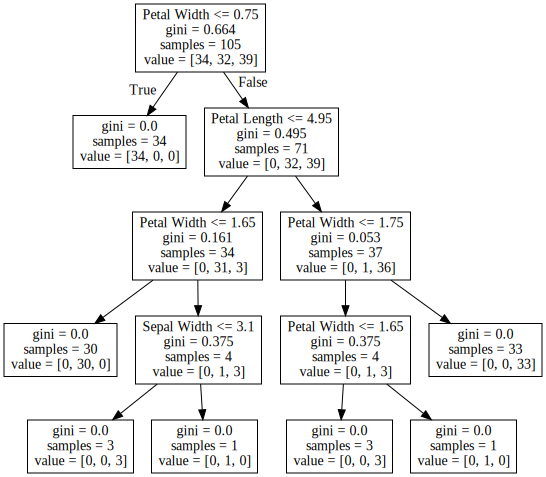

In [6]:
# plot the final decision gree
export_graphviz(tree, out_file='gini.dot', feature_names=features)
with open('gini.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

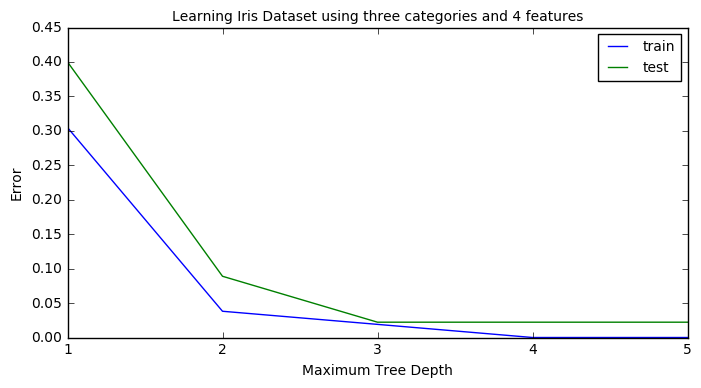

In [7]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning Iris Dataset using three categories and 4 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()